In [139]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [140]:
sales_data = pd.read_csv("/content/Sales_Train.csv")
sales_data.head()

Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]

In [141]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [142]:
sales_data['Item_Weight'].mean()

12.857645184136183

In [143]:
sales_data["Item_Weight"].fillna(sales_data['Item_Weight'].mean(),inplace=True)

In [144]:
sales_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [145]:
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [146]:
miss_values = sales_data['Outlet_Size'].isnull() 

In [147]:
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [148]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [149]:
sales_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [150]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [151]:
encoder = LabelEncoder()

In [152]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [153]:
sales_data.head()

Item_Identifier  Item_Weight  ...  Outlet_Type  Item_Outlet_Sales
0              156         9.30  ...            1          3735.1380
1                8         5.92  ...            2           443.4228
2              662        17.50  ...            1          2097.2700
3             1121        19.20  ...            0           732.3800
4             1297         8.93  ...            1           994.7052

[5 rows x 12 columns]

In [154]:
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder()

In [155]:
df1_data=pd.get_dummies(sales_data,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [156]:
X = df1_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = df1_data['Item_Outlet_Sales']
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Type_2  Outlet_Type_3
0                 156        9.300  ...              0              0
1                   8        5.920  ...              1              0
2                 662       17.500  ...              0              0
3                1121       19.200  ...              0              0
4                1297        8.930  ...              0              0
...               ...          ...  ...            ...            ...
8518              370        6.865  ...              0              0
8519              897        8.380  ...              0              0
8520             1357       10.600  ...              0              0
8521              681        7.210  ...              1              0
8522               50       14.800  ...              0              0

[8523 rows x 19 columns]


In [157]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [158]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=23,test_size=0.2)

In [159]:
X_train

Item_Identifier  Item_Weight  ...  Outlet_Type_2  Outlet_Type_3
3295              228     6.920000  ...              1              0
2681             1308    16.000000  ...              0              0
631               591    17.100000  ...              0              0
6314             1237    20.000000  ...              0              0
3596              759    15.600000  ...              0              0
...               ...          ...  ...            ...            ...
4019              884    19.850000  ...              0              0
3674              388    12.857645  ...              0              1
39                214    12.857645  ...              0              1
347              1430    19.500000  ...              0              0
6175              977     8.355000  ...              0              0

[6818 rows x 19 columns]

In [160]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [161]:
X_train_standard=sc.fit_transform(X_train)
X_train_standard

array([[-1.21611673e+00, -1.40885496e+00, -5.32188362e-01, ...,
        -1.38110922e+00,  2.88564540e+00, -3.48663229e-01],
       [ 1.18677856e+00,  7.47484746e-01,  6.38686744e-01, ...,
         7.24055696e-01, -3.46542926e-01, -3.48663229e-01],
       [-4.08476927e-01,  1.00871533e+00,  1.21012397e+00, ...,
         7.24055696e-01, -3.46542926e-01, -3.48663229e-01],
       ...,
       [-1.24726538e+00,  1.23095132e-03, -7.66841311e-01, ...,
        -1.38110922e+00, -3.46542926e-01,  2.86809711e+00],
       [ 1.45821673e+00,  1.57867296e+00, -9.74446653e-01, ...,
         7.24055696e-01, -3.46542926e-01, -3.48663229e-01],
       [ 4.50335649e-01, -1.06806779e+00,  2.36976415e+00, ...,
         7.24055696e-01, -3.46542926e-01, -3.48663229e-01]])

In [162]:
X_test_standard=sc.fit_transform(X_test)
X_test_standard

array([[ 0.46206773,  1.54515464, -0.69205008, ...,  0.73782387,
        -0.36143686, -0.36039887],
       [-1.41253155,  0.26173142, -1.29244959, ...,  0.73782387,
        -0.36143686, -0.36039887],
       [-1.58010598, -0.25163786,  0.92538332, ...,  0.73782387,
        -0.36143686, -0.36039887],
       ...,
       [ 0.20512028,  0.05171672, -0.43008125, ...,  0.73782387,
        -0.36143686, -0.36039887],
       [ 1.13906843,  1.91851412, -1.0854237 , ...,  0.73782387,
        -0.36143686, -0.36039887],
       [ 0.08446669,  0.69342832,  0.30811774, ...,  0.73782387,
        -0.36143686, -0.36039887]])

In [163]:
!pip install joblib

In [164]:
import joblib

In [165]:
joblib.dump(sc,r'C:\Users\siddu\OneDrive\Desktop\FALL SEM 21-22\Machine Learning\J comp\My Company Sales Prediction\models\sc.sav')

['C:\\Users\\siddu\\OneDrive\\Desktop\\FALL SEM 21-22\\Machine Learning\\J comp\\My Company Sales Prediction\\models\\sc.sav']

ML with Cross Validation Review 3

In [166]:
!pip install catboost

In [167]:
categorical_features_indices=np.where(X.dtypes!=np.float)[0]

In [168]:
from catboost import CatBoostRegressor
model1=CatBoostRegressor(iterations=1000,depth=5,learning_rate=0.1,loss_function='RMSE')
model1.fit(X_train,Y_train,cat_features=categorical_features_indices,eval_set=(X_test,Y_test),plot=True)
print(model1.score(X_train,Y_train))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1618.2367421	test: 1649.7231937	best: 1649.7231937 (0)	total: 10.7ms	remaining: 10.7s
1:	learn: 1540.0077167	test: 1573.2334018	best: 1573.2334018 (1)	total: 17.5ms	remaining: 8.75s
2:	learn: 1480.5759392	test: 1516.1726475	best: 1516.1726475 (2)	total: 22.5ms	remaining: 7.49s
3:	learn: 1419.1056536	test: 1456.3436216	best: 1456.3436216 (3)	total: 27.6ms	remaining: 6.88s
4:	learn: 1372.5586008	test: 1411.1377522	best: 1411.1377522 (4)	total: 32ms	remaining: 6.37s
5:	learn: 1327.0454596	test: 1367.1284020	best: 1367.1284020 (5)	total: 36.6ms	remaining: 6.06s
6:	learn: 1290.5729453	test: 1328.5820367	best: 1328.5820367 (6)	total: 43.1ms	remaining: 6.11s
7:	learn: 1253.8629130	test: 1292.2883123	best: 1292.2883123 (7)	total: 48.4ms	remaining: 6s
8:	learn: 1225.9342605	test: 1265.6217384	best: 1265.6217384 (8)	total: 53.8ms	remaining: 5.93s
9:	learn: 1201.5642214	test: 1241.3429173	best: 1241.3429173 (9)	total: 60.3ms	remaining: 5.97s
10:	learn: 1181.5366428	test: 1222.0405490	be

In [169]:
from sklearn.metrics import mean_squared_error

In [170]:
#linear regression
lr=LinearRegression()

In [171]:
lr.fit(X_train_standard,Y_train)

LinearRegression()

In [172]:
predict_lr=lr.predict(X_test_standard)
predict_lr

array([1594.45880721, 3558.98224131, 2882.91966504, ..., 2864.03373562,
       3861.83122822, 2761.97169185])

In [173]:
mse=mean_squared_error(Y_test,predict_lr)

In [174]:
lr_score=np.sqrt(mse)

In [175]:
lr_score

1142.9079578494907

In [176]:
#cross validation for Linear Regression

from sklearn.model_selection import cross_val_score

In [177]:
score=cross_val_score(lr,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')

In [178]:
lr_score_cross=np.sqrt(-score)

In [179]:
np.mean(lr_score_cross),np.std(lr_score_cross)

(1125.9934013099294, 30.48614978036799)

In [180]:
#Ridge Regression

from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(X_train_standard,Y_train)
predict_r=r.predict(X_test_standard)
mse=mean_squared_error(Y_test,predict_r)
r_score=np.sqrt(mse)
r_score

1142.8938080039468

In [181]:
# Cross validation of Ridge Regresssion

r=Ridge(alpha=0.05,solver='cholesky')
score=cross_val_score(r,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
r_score_cross=np.sqrt(-score)
np.mean(r_score_cross),np.std(r_score_cross)

(1125.9912950784574, 30.58025997579921)

In [182]:
#LASSO

from sklearn.linear_model import Lasso
l=Lasso(alpha=0.0)
l.fit(X_train_standard,Y_train)
predict_l=l.predict(X_test_standard)
mse=mean_squared_error(Y_test,predict_l)
l_score=np.sqrt(mse)
l_score

1143.5064050534477

In [183]:
# cross validation for lasso score

l=Lasso(alpha=0.01)
score=cross_val_score(l,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
l_score_cross=np.sqrt(-score)
np.mean(l_score_cross),np.std(l_score_cross)

(1126.1236142617747, 30.522199950444342)

In [184]:
# Elastic Net

from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
en.fit(X_train_standard,Y_train)
predict_r=en.predict(X_test_standard)
mse=mean_squared_error(Y_test,predict_r)
en_score=np.sqrt(mse)
en_score

1143.7781956089796

In [185]:
# cross validation with elastic Net

en=ElasticNet(alpha=0.01,l1_ratio=0.5)
score=cross_val_score(en,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
en_score_cross=np.sqrt(-score)
np.mean(en_score_cross),np.std(en_score_cross)

(1126.529823837761, 30.467803060530347)

In [186]:
# Stochastic Gradient

from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty='l2',max_iter=100,alpha=0.05)
sgd.fit(X_train_standard,Y_train)
predict_r=sgd.predict(X_test_standard)
mse=mean_squared_error(Y_test,predict_r)
sgd_score=np.sqrt(mse)
sgd_score

1150.7960473225328

In [187]:
# cross validation for Stochastic Gradient

sgd=SGDRegressor(penalty='l2',max_iter=100,alpha=0.05)
score=cross_val_score(sgd,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
sgd_score_cross=np.sqrt(-score)
np.mean(sgd_score_cross),np.std(sgd_score_cross)

(1131.0458692912457, 29.477388696583585)

In [188]:
# SVR --support vector Regression

from sklearn.svm import SVR
svm=SVR(epsilon=15,kernel='linear')
svm.fit(X_train_standard,Y_train)
predict_r=svm.predict(X_test_standard)
mse=mean_squared_error(Y_test,predict_r)
svm_score=np.sqrt(mse)
svm_score

1200.4452823646054

In [189]:
# Cross validation for SVR

svm=SVR(epsilon=15,kernel='linear')
score=cross_val_score(svm,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
svm_score_cross=np.sqrt(-score)
np.mean(svm_score_cross),np.std(svm_score_cross)

(1186.9545013502864, 36.241088575814)

In [190]:
#Decison Tree

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train_standard,Y_train)
predict_r=dtr.predict(X_test_standard)
mse=mean_squared_error(Y_test,predict_r)
dtr_score=np.sqrt(mse)
dtr_score

1541.4681461904488

In [191]:
#cross validation for Decision Tree

dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
dtr_score_cross=np.sqrt(-score)
np.mean(dtr_score_cross),np.std(dtr_score_cross)

(1546.2945282082512, 47.423948112288286)

In [217]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train_standard,Y_train)
predict_r=rf.predict(X_test_standard)
mse=mean_squared_error(Y_test,predict_r)
rf_score=np.sqrt(mse)
rf_score

1139.0301843190312

In [218]:
from sklearn.metrics import r2_score

In [220]:
print(r2_score(Y_test,predict_r))

0.5658261921554821


In [193]:
#cross validation for Random Forest

rf=RandomForestRegressor()
score=cross_val_score(rf,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

(1124.4769058591367, 29.22672894808082)

In [194]:
joblib.dump(rf,r'C:\Users\siddu\OneDrive\Desktop\FALL SEM 21-22\Machine Learning\J comp\My Company Sales Prediction\models\rf.sav')

['C:\\Users\\siddu\\OneDrive\\Desktop\\FALL SEM 21-22\\Machine Learning\\J comp\\My Company Sales Prediction\\models\\rf.sav']

In [195]:
#Bagging Regression

from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor(max_samples=100)
br.fit(X_train_standard,Y_train)

BaggingRegressor(max_samples=100)

In [196]:
score=br.predict(X_test_standard)
br_score=mean_squared_error(Y_test,score)

In [197]:
br_score=np.sqrt(br_score)
br_score

1168.1822121308073

In [198]:
# cross validation for Bagging Regression

br=BaggingRegressor()
score=cross_val_score(br,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
br_score_cross=np.sqrt(-score)
np.mean(br_score_cross),np.std(br_score_cross)

(1160.760076786331, 29.558088426944288)

In [199]:
# Adaptive Boosting
#here in place of exists I given ada as adaptive and aslo in place of there ..................

from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train_standard,Y_train)
g=ada.predict(X_test_standard)
ada_score=mean_squared_error(Y_test,g)
ada_score=np.sqrt(ada_score)
ada_score

1185.6796540150135

In [200]:
#cross validation for Adaptive Boosting

ada=AdaBoostRegressor()
score=cross_val_score(ada,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
ada_score_cross=np.sqrt(-score)
np.mean(ada_score_cross),np.std(ada_score_cross)

(1203.5773956607788, 63.17849568849869)

In [201]:
#gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train_standard,Y_train)
p=gbr.predict(X_test_standard)
gb_score=mean_squared_error(Y_test,p)
gb_score=np.sqrt(gb_score)
gb_score

1112.8270744166605

In [202]:
#cross validation for Gradient Boosting

gb=GradientBoostingRegressor()
score=cross_val_score(gb,X_train_standard,Y_train,cv=10,scoring='neg_mean_squared_error')
gb_score_cross=np.sqrt(-score)
np.mean(gb_score_cross),np.std(gb_score_cross)

(1077.9858325690625, 25.043478041553648)

Okay Now let's do the comparision

In [203]:
Models=['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Elastic Net Regression','Elastic Net Regression CV','Stochastic gradient Regression','Stochastic gradient Regression CV',
     'SVM','SVM CV','Decision Tree','Decision Tree CV','Random Forest','Random Forest CV','Adaptive Boosting','Adaptive Boosting CV',
     'Bagging Regression','Bagging Regression CV','Gradient Boosting','Gradient Boosting CV']

In [204]:
comparision=pd.DataFrame({'RMSE':[lr_score,lr_score_cross,r_score,r_score_cross,l_score,l_score_cross,en_score,en_score_cross,
                     sgd_score,sgd_score_cross,svm_score,svm_score_cross,dtr_score,dtr_score_cross,rf_score,rf_score_cross,
                     ada_score,ada_score_cross,br_score,br_score_cross,gb_score,gb_score_cross]},index=Models)

In [205]:
comparision['RMSE']=comparision.applymap(lambda x: x.mean())

In [206]:
comparision.RMSE.sort_values()

Gradient Boosting CV                 1077.985833
Gradient Boosting                    1112.827074
Random Forest CV                     1124.476906
Ridge Regression CV                  1125.991295
Linear Regression CV                 1125.993401
Lasso Regression CV                  1126.123614
Elastic Net Regression CV            1126.529824
Stochastic gradient Regression CV    1131.045869
Ridge Regression                     1142.893808
Linear Regression                    1142.907958
Lasso Regression                     1143.506405
Elastic Net Regression               1143.778196
Random Forest                        1144.940783
Stochastic gradient Regression       1150.796047
Bagging Regression CV                1160.760077
Bagging Regression                   1168.182212
Adaptive Boosting                    1185.679654
SVM CV                               1186.954501
SVM                                  1200.445282
Adaptive Boosting CV                 1203.577396
Decision Tree       

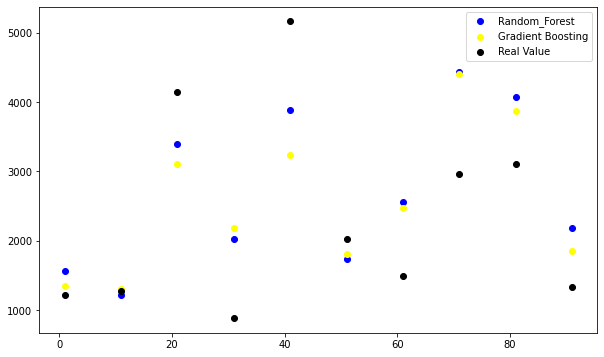

In [207]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),predict_r[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),p[0:100:10],color='yellow')
plt.scatter(np.arange(1,100,10),Y_test[0:100:10],color='black')
plt.legend(['Random_Forest','Gradient Boosting','Real Value'])

Hyper Parameter Tuning

In [209]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#give the models and parameters

model=RandomForestRegressor()
n_estimators=[10,100,100]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1,1.0)
max_features=['auto','sqrt','log2']
min_samples_split=np.linspace(0.1,1.0,10)

#grid search

grid=dict(n_estimators=n_estimators,max_depth=max_depth)
#cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=101)
grid_search_forest=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,scoring='r2',error_score=0,verbose=2,cv=2)
grid_search_forest.fit(X_train_standard,Y_train)

#now lets see the results

print(f"Best:{grid_search_forest.best_score_:.3f}using{grid_search_forest.best_params_}")
means=grid_search_forest.cv_results_['mean_test_score']
stds=grid_search_forest.cv_results_['std_test_score']
params=grid_search_forest.cv_results_['params']

for mean,stdev, param in zip(means,stds,params):
  print(f"{mean:.3f} ({stdev:.3f}) with:{param}")


Fitting 2 folds for each of 90 candidates, totalling 180 fits
Best:0.599using{'max_depth': 5, 'n_estimators': 100}
0.250 (0.001) with:{'max_depth': 1, 'n_estimators': 10}
0.250 (0.003) with:{'max_depth': 1, 'n_estimators': 100}
0.251 (0.002) with:{'max_depth': 1, 'n_estimators': 100}
0.451 (0.015) with:{'max_depth': 2, 'n_estimators': 10}
0.460 (0.009) with:{'max_depth': 2, 'n_estimators': 100}
0.461 (0.007) with:{'max_depth': 2, 'n_estimators': 100}
0.549 (0.005) with:{'max_depth': 3, 'n_estimators': 10}
0.548 (0.006) with:{'max_depth': 3, 'n_estimators': 100}
0.550 (0.006) with:{'max_depth': 3, 'n_estimators': 100}
0.590 (0.003) with:{'max_depth': 4, 'n_estimators': 10}
0.593 (0.003) with:{'max_depth': 4, 'n_estimators': 100}
0.593 (0.004) with:{'max_depth': 4, 'n_estimators': 100}
0.596 (0.006) with:{'max_depth': 5, 'n_estimators': 10}
0.599 (0.006) with:{'max_depth': 5, 'n_estimators': 100}
0.598 (0.006) with:{'max_depth': 5, 'n_estimators': 100}
0.594 (0.005) with:{'max_depth': 6,